In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np


In [2]:
from dataset import FlowerDataset

# Rut mau theo dac trung momentum

In [3]:
train_moment = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/train", "momentum")
test_moment = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/test", "momentum")

In [4]:
knn = KNeighborsClassifier(n_neighbors=7, metric='braycurtis', weights='distance')
knn.fit(train_moment.features, train_moment.labels)

KNeighborsClassifier(metric='braycurtis', n_neighbors=7, weights='distance')

In [5]:
y_hat = knn.predict(test_moment.features)

In [6]:
acc = accuracy_score(test_moment.labels, y_hat)
f1 = f1_score(test_moment.labels, y_hat, average='weighted')
precision = precision_score(test_moment.labels, y_hat, average='weighted')
recall = recall_score(test_moment.labels, y_hat, average='weighted')

In [7]:
print(f"Accuracy moment: {acc}")
print(f"F1 moment: {f1}")
print(f"Precision moment: {precision}")
print(f"Recall moment: {recall}")

Accuracy moment: 0.66
F1 moment: 0.6632659547419273
Precision moment: 0.6982600732600733
Recall moment: 0.66


# Rut theo dominant color

In [8]:
train_dominant = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/train", "dominant")
test_dominant = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/test", "dominant")

In [9]:
knn_dominant = KNeighborsClassifier(n_neighbors=7, metric='braycurtis', weights='distance')
knn_dominant.fit(train_dominant.features, train_dominant.labels)
y_hat_dominant = knn_dominant.predict(test_dominant.features)


In [10]:
acc_dominant = accuracy_score(test_dominant.labels, y_hat_dominant)
f1_dominant = f1_score(test_dominant.labels, y_hat_dominant, average='weighted')
precision_dominant = precision_score(test_dominant.labels, y_hat_dominant, average='weighted')
recall_dominant = recall_score(test_dominant.labels, y_hat_dominant, average='weighted')

In [11]:
print(f"Accuracy moment: {acc_dominant}")
print(f"F1 moment: {f1_dominant}")
print(f"Precision moment: {precision_dominant}")
print(f"Recall moment: {recall_dominant}")

Accuracy moment: 0.44
F1 moment: 0.4126666666666667
Precision moment: 0.42095238095238097
Recall moment: 0.44


# Histogram

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np


In [13]:
from dataset import FlowerDataset

In [14]:
train_hist_8 = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/train", "histogram old")
test_hist_8 = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/test", "histogram old")

In [15]:
knn_hist_8 = KNeighborsClassifier(n_neighbors=7, metric='braycurtis', weights='distance')
knn_hist_8.fit(train_hist_8.features, train_hist_8.labels)
y_hat_hist_8 = knn_hist_8.predict(test_hist_8.features)

In [16]:
acc_hist_8 = accuracy_score(test_hist_8.labels, y_hat_hist_8)
f1_hist_8 = f1_score(test_hist_8.labels, y_hat_hist_8, average='weighted')
precision_hist_8 = precision_score(test_hist_8.labels, y_hat_hist_8, average='weighted')
recall_hist_8 = recall_score(test_hist_8.labels, y_hat_hist_8, average='weighted')

In [17]:
print(f"Accuracy moment: {acc_hist_8}")
print(f"F1 moment: {f1_hist_8}")
print(f"Precision moment: {precision_hist_8}")
print(f"Recall moment: {recall_hist_8}")

Accuracy moment: 0.9
F1 moment: 0.8982148854271617
Precision moment: 0.9205128205128206
Recall moment: 0.9


In [18]:
train_hist_16 = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/train", "histogram", bins=16)
test_hist_16 = FlowerDataset("/home/huatansang/Documents/IntroductiontoCV/HoaVietNam/test", "histogram", bins=16)

In [19]:
knn_hist_16 = KNeighborsClassifier(n_neighbors=7, metric='braycurtis', weights='distance')
knn_hist_16.fit(train_hist_16.features, train_hist_16.labels)
y_hat_hist_16 = knn_hist_16.predict(test_hist_16.features)


In [20]:
acc_hist_16 = accuracy_score(test_hist_16.labels, y_hat_hist_16)
f1_hist_16 = f1_score(test_hist_16.labels, y_hat_hist_16, average='weighted')
precision_hist_16 = precision_score(test_hist_16.labels, y_hat_hist_16, average='weighted')
recall_hist_16 = recall_score(test_hist_16.labels, y_hat_hist_16, average='weighted')

print(f"Accuracy hist 16: {acc_hist_16}")
print(f"F1 hist 16: {f1_hist_16}")
print(f"Precision hist 16: {precision_hist_16}")
print(f"Recall hist 16: {recall_hist_16}")

Accuracy hist 16: 0.88
F1 hist 16: 0.8779526355996944
Precision hist 16: 0.8903030303030303
Recall hist 16: 0.88


# So sanh ket qua 

In [21]:
import matplotlib.pyplot as plt 
import cv2 

2.1 Nhung anh model truoc sai nhung bay gio dung

In [22]:
improved_indices = np.where((y_hat_hist_8 != test_hist_8.labels) & (y_hat_hist_16 == test_hist_16.labels))[0]

In [23]:
improved_indices

array([49])

True label: 4
Predicted label: 1


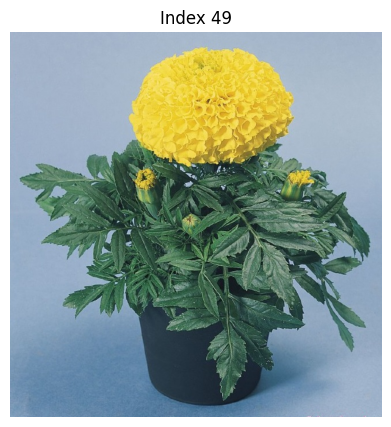

In [24]:
def show_images_matplotlib(dataset, indices, y_hat):
    fig, axes = plt.subplots(1, len(indices), figsize=(15, 5))  

    if len(indices) == 1:
        axes = [axes]  

    for ax, idx in zip(axes, indices):
        _, label, img_path = dataset[idx]  
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển từ BGR sang RGB
        ax.imshow(img)
        ax.set_title(f"Index {idx}")
        print(f"True label: {label}")
        print(f"Predicted label: {y_hat[49]}")
        ax.axis("off")

    plt.show()


show_images_matplotlib(test_hist_16, improved_indices, y_hat_hist_8)

2.2 Nhung anh ma ca hai deu sai

In [25]:
wrong_indices = np.where((y_hat_hist_16 != test_hist_16.labels))[0]
wrong_indices

array([19, 25, 27, 28, 30, 45])

True label: 1
Predicted label: 4
True label: 2
Predicted label: 4
True label: 2
Predicted label: 4
True label: 2
Predicted label: 4
True label: 3
Predicted label: 4
True label: 4
Predicted label: 4


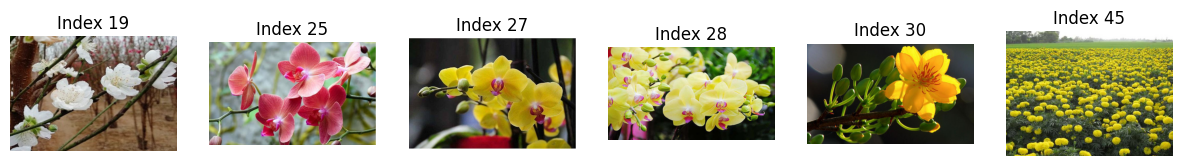

In [26]:
show_images_matplotlib(test_hist_16, wrong_indices, y_hat_hist_16)

2.3 Nhung anh model truoc dung nhung bay gio sai

In [27]:
improved_indices = np.where((y_hat_hist_16 != test_hist_16.labels) & (y_hat_hist_8 == test_hist_8.labels))[0]

True label: 1
Predicted label: 4
True label: 3
Predicted label: 4


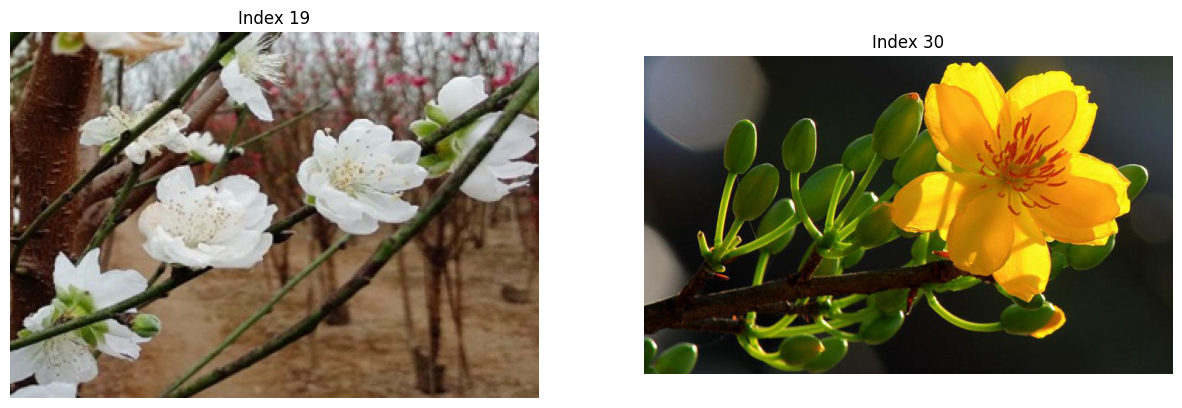

In [28]:
show_images_matplotlib(test_hist_16, improved_indices, y_hat_hist_16)